# Support Vector Regression (SVR)

In [98]:
########PROBLEMAS NO LINEALES 
#en este caso es útil emplear SVR porque se trata de un problema no lineal (datos no distribuidos) y la regresión lineal no funciona




#####################################################REVISAR!!!

## Importing the libraries

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [100]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head() 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [101]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [102]:
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [103]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Splitting the dataset into the Training set and Test set

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [105]:
#es necesario estandarizar los datos
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X)
y_train = sc_y.fit_transform(y)

#esto solo para los gráficos
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [106]:
print(X_train)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [107]:
print(y_train)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [108]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') #Gaussian Radial Basis Function
regressor.fit(X_train, y_train)

c:\Users\pbartolome\AppData\Local\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting the results

In [113]:
y_pred = regressor.predict(X_test).reshape(-1,1) #se obtienen las predicciones con escalado
print(y_pred)
y_pred = sc_y.inverse_transform(y_pred) #se hace escalado inverso para recuperar los valores
print(y_pred)

[[0.16176266]
 [0.01158103]]
[[295442.37646748]
 [252789.13920842]]
[[ 60000]
 [500000]]


## Predicting a new result

In [110]:
new_data = sc_X.transform([[6.5]])
new_pred = regressor.predict(new_data).reshape(-1,1)
new_pred = sc_y.inverse_transform(new_pred) #escalado inverso

## Visualising the SVR results

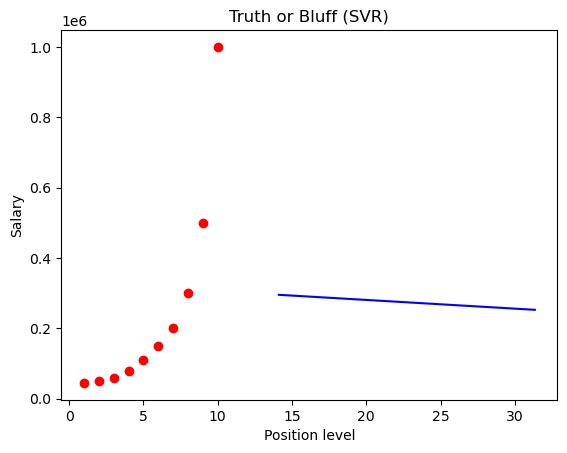

In [112]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red') #se vuelve a hacer escalado inverso para volver a los valores reales
plt.plot(sc_X.inverse_transform(X_test), y_pred, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

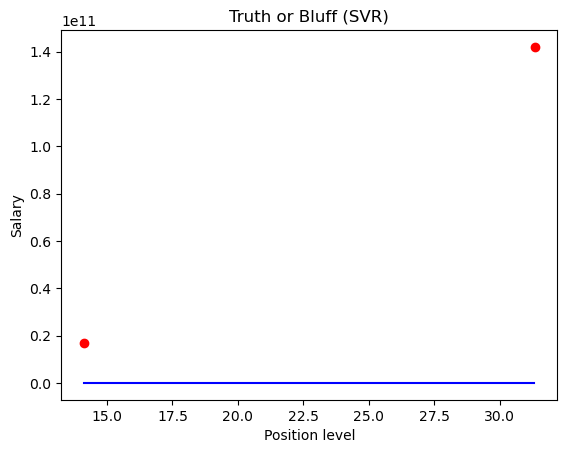

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #se debería hacer sobre un mismo dataset para todos los casos

ValueError: Found input variables with inconsistent numbers of samples: [2, 10]